<a href="https://colab.research.google.com/github/AdityaStark7/Whatsapp_chat_analysis/blob/main/whatsapp_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

     |████████████████████████████████| 184 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=c9bedc9b07d35ef9114730a7e29075a9f653d7949d18c99bbfdfd3d61e6df224
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [ ]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
parseData = [] 
conversation = 'WhatsApp Chat with EE-1 Unofficial.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parseData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with EE-1 Unofficial.txt to WhatsApp Chat with EE-1 Unofficial (7).txt


In [ ]:
df = pd.DataFrame(parseData, columns=['Date', 'Time', 'Author', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
39866,2021-09-13,22:51,Aditi Garg DTU,aree yrrrr
39867,2021-09-13,22:51,+91 96253 86050,Answer lene hai
39868,2021-09-13,22:51,+91 96253 86050,<Media omitted>
39869,2021-09-13,22:51,+91 94637 02007,Smart boiiii
39870,2021-09-13,22:51,+91 93118 01016,<Media omitted>
39871,2021-09-13,22:52,+91 94637 02007,Bc baba adam ki kitab se daala hai isne ye saw...
39872,2021-09-13,22:53,+91 96253 86050,Solve krle bhay
39873,2021-09-13,22:53,+91 96253 86050,<Media omitted>
39874,2021-09-13,22:53,+91 94637 02007,Abey c part toh hua hi nahi hai
39875,2021-09-13,22:53,+91 94637 02007,Baaki toh aa ho gaye tere pass


In [ ]:
df.Author.unique()

In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

4704
0
Data science Community
Media: 4704
Emojis: 0
Links: 288


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Ashu Singh", "Aditi Garg DTU", "Amandeep DTU"]
for i in range(len(l)):
  req_df= messages_df[messages_df["Author"] == l[i]]
  print(f'Stats of {l[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35182 entries, 0 to 39884
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      35182 non-null  datetime64[ns]
 1   Time      35182 non-null  object        
 2   Author    34528 non-null  object        
 3   Message   35182 non-null  object        
 4   emoji     35182 non-null  object        
 5   urlcount  35182 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.9+ MB
Stats of Ashu Singh -
Messages Sent 958
Words per message 4.763048016701461
Media Messages Sent 132
Emojis Sent 0
Links Sent 3

Stats of Aditi Garg DTU -
Messages Sent 966
Words per message 3.8850931677018634
Media Messages Sent 21
Emojis Sent 0
Links Sent 0

Stats of Amandeep DTU -
Messages Sent 1793
Words per message 4.784718349135527
Media Messages Sent 97
Emojis Sent 0
Links Sent 0



In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 844922 words in all the messages.


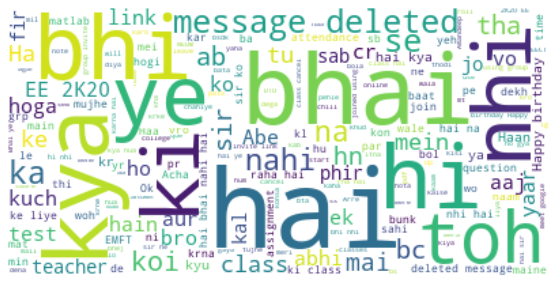

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Apoorva DTU


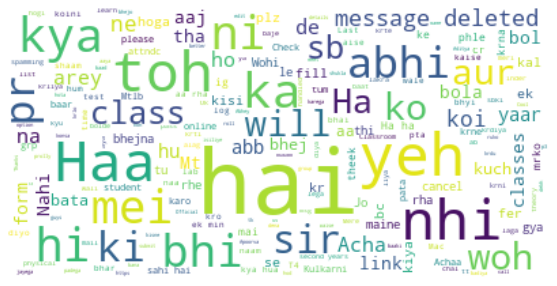

Author name Aditi Garg DTU


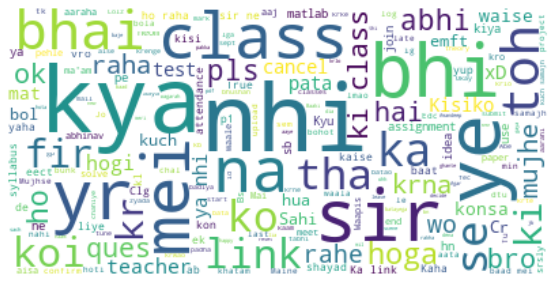

Author name Amandeep DTU


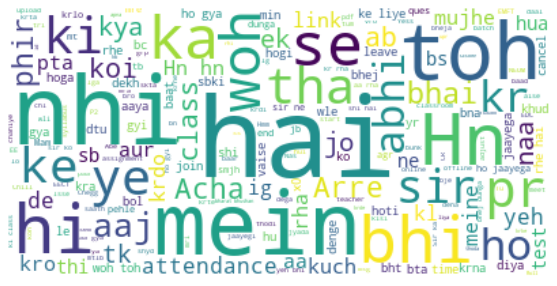

In [ ]:
l = ["Apoorva DTU", "Aditi Garg DTU", "Amandeep DTU"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()